# Método de gradiente descendente para búsqueda en linea

In [37]:
import numpy as np
from numpy import linalg as la

In [38]:
f=open("yk.txt", "r")
contenido=f.read()
contenido=contenido.split(',')

In [39]:
l=1000.0 #definimos lambda como una variable global
n=int(contenido[0]) #n tambien
y=np.zeros(n)   #y como un vector global de datos 
for i in range (1,len(contenido)):
    y[i-1]=float(contenido[i])

In [40]:
#Definición de las funciones
def funcion(x): #funcion objetivo
    return sum((x[:]-y[:])**2) + l*sum((x[1:]-x[:-1])**2)

def der_funcion(x): #gradiente de la función
    xm = x[1:-1]
    ym= y[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der=np.zeros(n)
    der[0]=2*(x[0]-y[0])-2*l*(x[1]-x[0])
    der[1:-1]=2*(xm-ym)+2*l*(2*xm-1*(xm_p1+xm_m1))
    der[-1]=2*(x[-1]-y[-1])+2*l*(x[-1]-x[-2])
    return der

def hessiano_funcion(x):
    hes=np.zeros((n,n)) #una matriz cuadrada de 256 números!!!!!
    hes[0][0]=2+2*l
    hes[1][0]=-2*l
    hes[-1][-1]=2+2*l
    hes[-2][-1]=-2*l
    for i in range (1,n-1):
        hes[i][i]=2+4*l
        hes[i-1][i]=-2*l
        hes[i+1][i]=-2*l
    return hes

In [41]:
import matplotlib.pyplot as plt

def gradientdescent_hessian(x0,mxitr,tolgrad,tf,gf,H): #Descenso de gradiente con backtracking
    iterations=0
    g_k=gf(x0) #sacamos el gradiente
    g=-1*g_k #la dirección es la -gradiente 
    puntoiter=x0
    stepsize=np.dot(g_k.T,g_k)*(1/(np.dot(np.dot(g_k.T,H(puntoiter)),g_k)))
    while la.norm(g_k)>tolgrad and iterations<mxitr:
        stepsize=np.dot(g_k.T,g_k)*(1/(np.dot(np.dot(g_k.T,H(puntoiter)),g_k)))
        puntoiter=puntoiter+stepsize*g
        g_k=gf(puntoiter)
        g=-1*g_k #g es la dirección de descenso en principio
        iterations=iterations+1
        #print(la.norm(g_k))
        print(iterations-1, '&', la.norm(g_k) )
    return np.array([puntoiter,la.norm(g_k),iterations-1])   

0 & 45240.38679508327
1 & 17938.348189021533
2 & 14975.87213487309
3 & 10882.103583918508
4 & 11043.883766569146
5 & 8702.360795562538
6 & 9345.102130573096
7 & 7608.076810694079
8 & 8392.300600437282
9 & 6956.385556143195
10 & 7797.839792218566
11 & 6538.784208673922
12 & 7408.359092741949
13 & 6261.333284669242
14 & 7146.038781190703
15 & 6072.673341846099
16 & 6965.614177879798
17 & 5941.800276067118
18 & 6838.974646436419
19 & 5849.125256887722
20 & 6748.1334042955195
21 & 5782.0077367351705
22 & 6681.406473876099
23 & 5732.193979213118
24 & 6631.1269257591775
25 & 5694.245004562532
26 & 6592.217312983672
27 & 5664.543725796415
28 & 6561.28207473778
29 & 5640.660433581775
30 & 6536.025805431667
31 & 5620.9448099001565
32 & 6514.878362406566
33 & 5604.262282157555
34 & 6496.751961446325
35 & 5589.822702359085
36 & 6480.8828022632715
37 & 5577.0682839808105
38 & 6466.727048547543
39 & 5565.599735593529
40 & 6453.8919358205285
41 & 5555.127148887195
42 & 6442.089721113715
43 & 5545.43

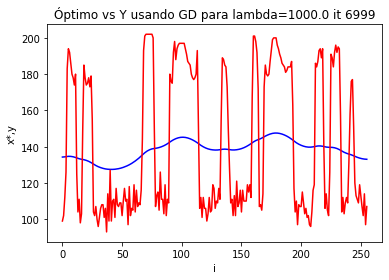

In [42]:
x0=np.zeros(n) #Que pasa con el punto inicial?
resultado=gradientdescent_hessian(x0,7000,1e-4,funcion,der_funcion,hessiano_funcion)
index=np.arange(n)
print(str(resultado[2])+'  iteraciones')
plt.title('Óptimo vs Y usando GD para lambda='+str(l)+' it '+str(resultado[2]))
plt.ylabel('x*,y')
plt.xlabel('i')
plt.plot(index,resultado[0],'b')
plt.plot(index,y,'r')
#plt.show()
plt.savefig('g_d'+str(l)+'.png')

In [23]:
'''x=np.ones(4)
y=[62,551,2813,5682]
lambdas=[1,10,50,100]
plt.plot(lambdas,x,'go')
plt.plot(lambdas,x,'g')
plt.plot(lambdas,y,'ro')
plt.plot(lambdas,y,'r')
plt.title('Lambdas vs iteraciones')
plt.savefig('l_v_it.png')'''

"x=np.ones(4)\ny=[62,551,2813,5682]\nlambdas=[1,10,50,100]\nplt.plot(lambdas,x,'go')\nplt.plot(lambdas,x,'g')\nplt.plot(lambdas,y,'ro')\nplt.plot(lambdas,y,'r')\nplt.title('Lambdas vs iteraciones')\nplt.savefig('l_v_it.png')"